Importamos librerias necesarias

Importamos librerias necesarias

In [64]:
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt


cargamos datos desde csv

leemos y mostramos nuestro df

In [65]:
df_edx= pd.read_csv('D:edx_courses.csv')
df_edx

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https:

Aplicamos un .info y un .describe para orientarnos en nuestro df.

In [66]:
df_edx.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [67]:
df_edx.describe()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
count,975,922,855,975,975,972,975,975,975,972,975,975,975,935,414,975
unique,972,887,849,2,111,775,3,31,9,33,53,18,47,932,411,974
top,Introduction to Probability,This course is part of a MicroMasters® Program,"97,291",Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Computer Science,English,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,"About the Database Series of Courses""Databases...",Course Outline:,https://www.edx.org/course/introduction-to-pro...
freq,2,15,2,917,104,9,621,166,777,713,108,194,270,3,3,2


Eliminamos algunas columnas que consideramos innecesarias debido a la info que contienen.

In [68]:
columns_to_drop=['course_syllabus','course_url']

df_edx.drop(columns_to_drop,axis=1, inplace=True)

Cromprobamos

In [69]:
df_edx

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ..."


Corregimos el tipo de dato en nuestra columna n_enrolled que es el numero de inscriptos 

In [70]:
df_edx['n_enrolled'] = df_edx['n_enrolled'].str.replace(',', '')
df_edx['n_enrolled'] = df_edx['n_enrolled'].astype(float)


Rellenamos vacios

In [71]:
df_edx['n_enrolled'] = df_edx['n_enrolled'].fillna(0)

In [72]:
df_edx['n_enrolled'] = df_edx['n_enrolled'].astype(int)

y comprobamos los cambios

In [73]:

df_edx.dtypes

title                 object
summary               object
n_enrolled             int32
course_type           object
institution           object
instructors           object
Level                 object
subject               object
language              object
subtitles             object
course_effort         object
course_length         object
price                 object
course_description    object
dtype: object

Obtenemos una nueva columna con el precio del certificado del curso

In [74]:
#Nuestra funcion por medio de libreria Re extrae el numero dentro del tenxto
def extraer_numero(texto):
    match = re.search(r'\d+', texto)
    if match:
        return float(match.group())
    return None
#aplicamos la funcion a la columna price
df_edx['price_certificate'] = df_edx['price'].apply(extraer_numero)
df_edx

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,price_certificate
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",49.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,49.0
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",90.0
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",199.0
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,249.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",0,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,25.0
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,0,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,139.0
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,139.0
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",25.0


obtenemos si tiene la opcion FREE o no a partir de la columna price

In [75]:
df_edx['is_free'] = df_edx['price'].str.contains('FREE')

Hacemos un vistaso para analizar los primeros cursos con mas cantidad de inscriptos.

In [76]:
df_edx.sort_values('n_enrolled',ascending=False).head(15)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,price_certificate,is_free
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",90.0,True
29,IELTS Academic Test Preparation,Prepare for the IELTS Academic tests in this c...,1103777,Self-paced on your time,The University of Queensland,Iain Mathieson-Martin Dutton-Megan Yucel-Steph...,Introductory,Communication,English,English,5–10 hours per week,8 Weeks,FREE-Add a Verified Certificate for $99 USD,IELTS is the world's most popular English lang...,99.0,True
31,TOEFL® Test Preparation: The Insider’s Guide,Prepare for the TOEFL® test and learn how to i...,1022489,Self-paced on your time,Educational Testing Service,Michael Knab-Cynthia Newman-Shawn Gorman-Molly...,Introductory,Communication,English,English,2–4 hours per week,6 Weeks,FREE-Add a Verified Certificate for $49 USD,"This test preparation course, developed by the...",49.0,True
23,CS50's Web Programming with Python and JavaScript,"This course picks up where CS50 leaves off, di...",698950,Self-paced on your time,Harvard University,David J. Malan-Brian Yu,Intermediate,Computer Science,English,English,6–9 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"Topics include database design, scalability, s...",90.0,True
64,Introduction to Linux,Never learned Linux? Want a refresh? Develop a...,642088,Self-paced on your time,The Linux Foundation,Jerry Cooperstein,Introductory,Computer Science,English,English,5–7 hours per week,14 Weeks,FREE-Add a Verified Certificate for $199 USD,Develop a good working knowledge of Linux usin...,199.0,True
16,Data Science: R Basics,Build a foundation in R and learn how to wrang...,528782,Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Data Analysis & Statistics,English,English,1–2 hours per week,8 Weeks,FREE-Add a Verified Certificate for $49 USD,The first in our Professional Certificate Prog...,49.0,True
48,The Science of Happiness,The first MOOC to teach positive psychology. L...,475614,Self-paced on your time,"University of California, Berkeley",Dacher Keltner-Emiliana Simon-Thomas,Introductory,Social Sciences,English,English,4–5 hours per week,11 Weeks,FREE-Add a Verified Certificate for $169 USD,"""A free eight-week Science of Happiness course...",169.0,True
24,Contract Law: From Trust to Promise to Contract,"Contracts are a part of our everyday life, ari...",414181,Self-paced on your time,Harvard University,Charles Fried,Intermediate,Business & Management,English,English,3–6 hours per week,8 Weeks,FREE-Add a Verified Certificate for $125 USD,Learn about contracts from Harvard Law Profess...,125.0,True
30,The Architectural Imagination,Learn fundamental principles of architecture —...,406181,Self-paced on your time,Harvard University,Lisa Haber-Thomson-K. Michael Hays-Erika Nagin...,Introductory,Architecture,English,English,3–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Architecture engages a culture’s deepest socia...,99.0,True
35,Basic Spanish 1: Getting Started,Learn Spanish and explore Spanish culture in t...,400169,Self-paced on your time,Universitat Politècnica de Valencia,Prof. Ana Gimeno-Virginia González-Cristina Na...,Introductory,Communication,English,"English, Español",4–5 hours per week,7 Weeks,FREE-Add a Verified Certificate for $40 USD,This 7-week Spanish language course is aimed a...,40.0,True


In [77]:
#median_n_enrolled = df_edx['n_enrolled'].median()
#df_edx_succs = df_edx[df_edx['n_enrolled'] > median_n_enrolled].copy()
#median_n_enrolled

Seleccionamos los primeros 100 cursos con mas cantidad de inscriptos

In [82]:
df_edx_succs = df_edx.nlargest(100, 'n_enrolled')
df_edx_succs

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_length,course_description,price_certificate,is_free
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,12 Weeks,"This is CS50x , Harvard University's introduct...",90.0,True
29,IELTS Academic Test Preparation,Prepare for the IELTS Academic tests in this c...,1103777,Self-paced on your time,The University of Queensland,Iain Mathieson-Martin Dutton-Megan Yucel-Steph...,Introductory,Communication,English,English,8 Weeks,IELTS is the world's most popular English lang...,99.0,True
31,TOEFL® Test Preparation: The Insider’s Guide,Prepare for the TOEFL® test and learn how to i...,1022489,Self-paced on your time,Educational Testing Service,Michael Knab-Cynthia Newman-Shawn Gorman-Molly...,Introductory,Communication,English,English,6 Weeks,"This test preparation course, developed by the...",49.0,True
23,CS50's Web Programming with Python and JavaScript,"This course picks up where CS50 leaves off, di...",698950,Self-paced on your time,Harvard University,David J. Malan-Brian Yu,Intermediate,Computer Science,English,English,12 Weeks,"Topics include database design, scalability, s...",90.0,True
64,Introduction to Linux,Never learned Linux? Want a refresh? Develop a...,642088,Self-paced on your time,The Linux Foundation,Jerry Cooperstein,Introductory,Computer Science,English,English,14 Weeks,Develop a good working knowledge of Linux usin...,199.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,CSS Basics,Learn how to take your Web pages from bland to...,95163,Self-paced on your time,The World Wide Web Consortium (W3C),Kasey Champion,Introductory,Computer Science,English,English,5 Weeks,"This course is part of W3C's ""Front-End Web De...",199.0,True
89,Analyzing Data with Python,"In this course, you will learn how to analyze ...",94079,Self-paced on your time,IBM,Joseph Santarcangelo,Introductory,Data Analysis & Statistics,English,English,5 Weeks,LEARN TO ANALYZE DATA WITH PYTHONLearn how to ...,39.0,True
419,Greatest Unsolved Mysteries of the Universe,Exploring the biggest mysteries of modern astr...,93965,Self-paced on your time,Australian National University,Brian Schmidt-Paul Francis,Intermediate,Physics,English,English,9 Weeks,"Despite spectacular recent progress, there is ...",50.0,True
337,Object-Oriented Programming,Learn the principles of programming for buildi...,93633,Self-paced on your time,IITBombay,Deepak B. Phatak-Supratik Chakraborty-Nagesh K...,Introductory,Computer Science,English,English,4 Weeks,Go beyond the basics of programming to underst...,149.0,True


Con nuestros primeros 100 hacemos nuestra nube de palabras

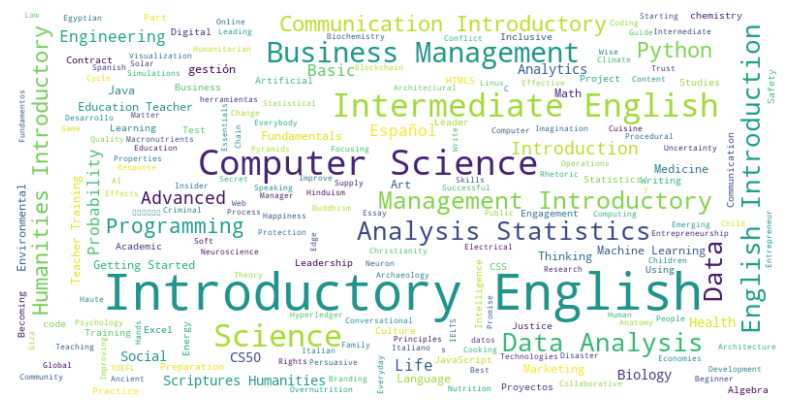

In [79]:
from wordcloud import WordCloud, STOPWORDS

#Creamos la variable con nuestras columnas y creamos las stopwords
text = ' '.join(df_edx_succs[['title','subject', 'Level', 'language']].values.flatten().astype(str))
stopwordsv = set(STOPWORDS)
stopwordsv.update(['learn', 'course', 'de'])

# Creamos el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwordsv).generate(text)

# Mostramos el Word Cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

eliminamos mas columnas que no utilizaremos

In [80]:
columns_to_drop2=['price','course_effort']

df_edx.drop(columns_to_drop2,axis=1, inplace=True)

Exportamos archivo como csv.

In [81]:
#df_edx.to_csv('edx_clean.csv', index=False)